

> Yuninda Intan

> 21051214025

> Sistem Informasi 2021 A



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Dataset/Passengers carried.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,223502.00,274280.00,NaN,NaN
1,Africa Eastern and Southern,AFE,3418300.0,3775300.0,4074500.0,4808000.0,5126100.0,5333100.0,6040400.0,5798900.0,...,3.350782e+07,3.583868e+07,35112457.82,36350758.95,39154692.0,41553429.0,45423814.08,52613964.08,5.433525e+07,NaN
2,Afghanistan,AFG,84700.0,97400.0,104900.0,96600.0,96100.0,99000.0,101700.0,111200.0,...,2.279341e+06,1.737962e+06,2044188.00,2209428.00,1929907.0,1917924.0,1647425.00,1125367.00,1.066747e+06,NaN
3,Africa Western and Central,AFW,1167000.0,1238100.0,1285700.0,1453300.0,1685700.0,1987500.0,2540000.0,2962100.0,...,9.140452e+06,9.570162e+06,8677884.00,8030237.17,8696300.0,8129874.0,8837017.00,12337766.28,1.134659e+07,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,155400.0,282700.0,...,9.877980e+05,1.132424e+06,1321872.00,1409952.00,1244491.0,1482546.0,1375523.00,1516628.00,1.436959e+06,NaN


In [ ]:
# Menghitung Nilai Median dari data yang bertype Numerik
df_tahunan = data.select_dtypes(include=np.number).median()
df = pd.DataFrame(df_tahunan[:-1])

In [ ]:
df.reset_index(inplace=True)
df.columns=['year','median']

In [ ]:
df

,year,median
0,1970,6.576000e+05
1,1971,7.148000e+05
2,1972,7.856000e+05
3,1973,8.190000e+05
4,1974,1.116900e+06
5,1975,1.026850e+06
6,1976,1.055400e+06
7,1977,1.123300e+06
8,1978,1.426300e+06
9,1979,1.581300e+06


In [ ]:
df.describe()

,median
count,5.000000e+01
mean,2.241473e+06
std,1.586306e+06
min,6.576000e+05
25%,1.209675e+06
50%,1.403025e+06
75%,2.986370e+06
max,6.489805e+06


In [ ]:
percentile_95 = np.percentile(df['median'], 95, method='median_unbiased')
percentile_5 = np.percentile(df['median'], 5, method='median_unbiased')
greater_than_95 = (df[['median']] > percentile_95)
smaller_than_5 = (df[['median']] < percentile_5)

In [ ]:
 #Membuat kolom baru dengan nama colors untuk menyimpan warna setiap kondisi diatas
df['colors'] = np.where(greater_than_95,'r',np.where(smaller_than_5,'r','b'))

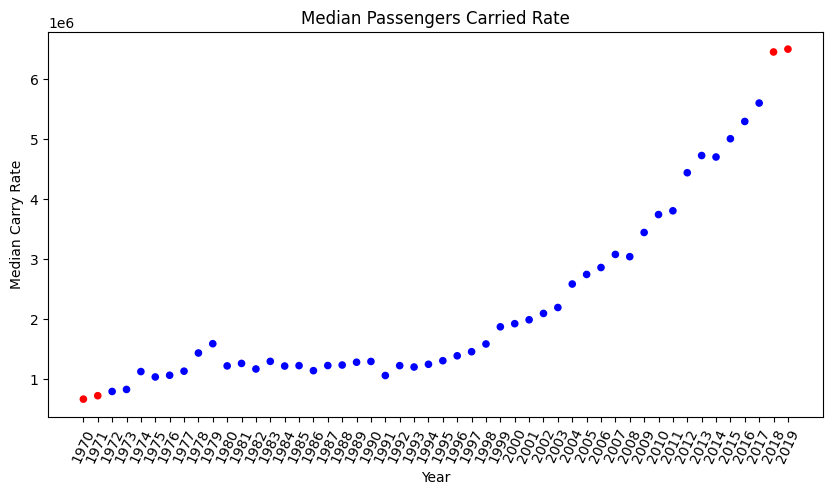

In [ ]:
import matplotlib.pyplot as plt
df.plot.scatter(x='year',y='median',c = df['colors'].apply(lambda x: dict(r='red', b='blue')[x]),
           figsize=(10, 5),title='Median Passengers Carried Rate',xlabel='Year',ylabel='Median Carry Rate')
plt.xticks(rotation=65);

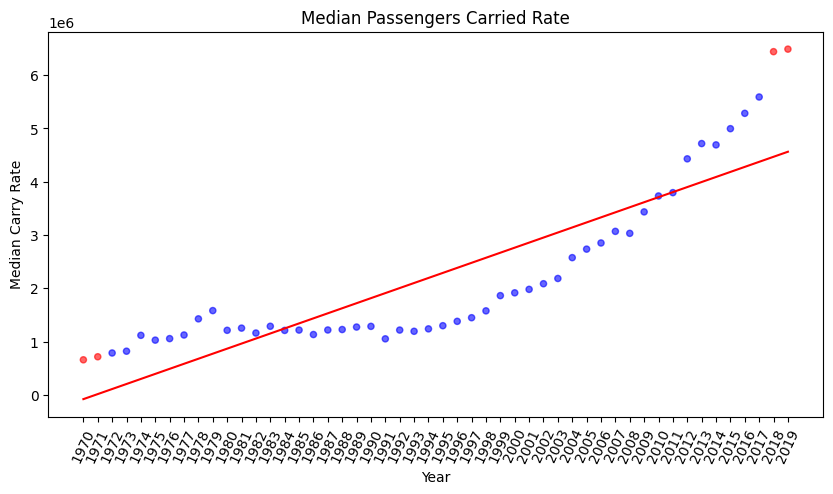

In [ ]:
#Pendekatan Statistik dengan Analisis Regresi
from sklearn.linear_model import LinearRegression
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(df[['year']], df[['median']])
ax = df.plot.scatter(x='year', y='median',
c=df['colors'].apply(lambda x: dict(r='red', b='blue')[x]), alpha=.6, figsize=(10, 5),
    title='Median Passengers Carried Rate', xlabel='Year', ylabel='Median Carry Rate')
reg_prediction = LinearRegression_model.predict(df[['year']])
ax.plot(df['year'], reg_prediction, c='r')
plt.xticks(rotation=65);

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
model_LOF = LocalOutlierFactor()
LOF_predictions = model_LOF.fit_predict(df[['median']])
model_LOF_scores = model_LOF.negative_outlier_factor_
df['LOF_anomaly_scores'] = model_LOF_scores
df['LOF_anomaly'] = LOF_predictions

<ipython-input-19-3b38c11d895c>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


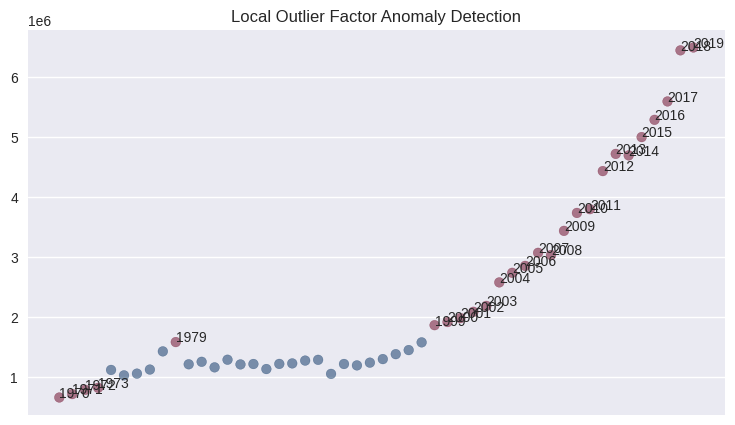

In [ ]:
plt.style.use("seaborn")
fig, ax = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
ax.scatter(df['year'], df['median'],c=df['LOF_anomaly'],cmap='RdBu',alpha=0.5 )
ax.set_title("Local Outlier Factor Anomaly Detection")

for anomaly in df[df['LOF_anomaly'] == -1]['year']:
    ax.annotate(anomaly, xy=(anomaly, df[df['year'] == anomaly]['median']),
                 xytext=(anomaly,df[df['year'] == anomaly]['median'] + 0.2))
ax.get_xaxis().set_visible(False)

In [ ]:
model_LOF_10 = LocalOutlierFactor(n_neighbors=10)
LOF_predictions_10 = model_LOF_10.fit_predict(df[['median']])
model_LOF_scores_10= model_LOF_10.negative_outlier_factor_
df['LOF_anomaly_score_10'] = model_LOF_scores_10
df['LOF_anomaly_10'] = LOF_predictions_10

<ipython-input-21-8696406c8c9a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


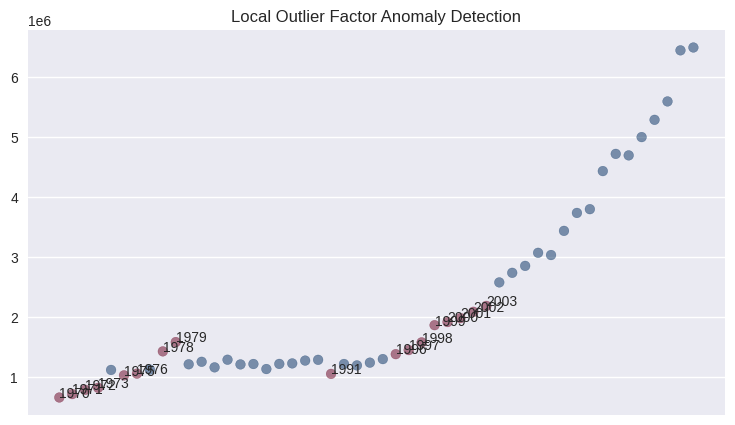

In [ ]:
plt.style.use("seaborn")
fig, ax2 = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
ax2.scatter(df['year'], df['median'],c=df['LOF_anomaly_10'],cmap='RdBu',alpha=0.5 )
ax2.set_title("Local Outlier Factor Anomaly Detection")

for anomaly in df[df['LOF_anomaly_10'] == -1]['year']:
    ax2.annotate(anomaly, xy=(anomaly, df[df['year'] == anomaly]['median']),
                 xytext=(anomaly,df[df['year'] == anomaly]['median'] + 0.2))
ax2.get_xaxis().set_visible(False)

In [ ]:
from sklearn.ensemble import IsolationForest
model_IF = IsolationForest()
model_IF.fit(df[['median']])
df['IF_anomaly_scores'] = model_IF.decision_function(df[['median']])
df['IF_anomaly'] = model_IF.predict(df[['median']])

<ipython-input-23-bbb99b71e52e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


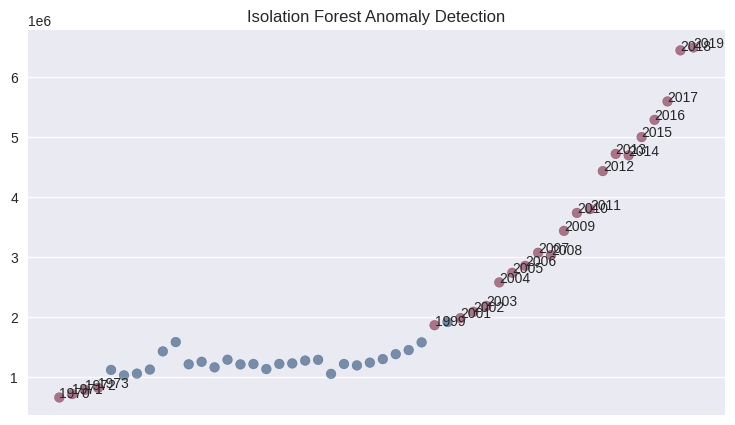

In [ ]:
plt.style.use("seaborn")
fig, ax3 = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
ax3.scatter(df['year'], df['median'],c=df['IF_anomaly'],cmap='RdBu',alpha=0.5 )
ax3.set_title("Isolation Forest Anomaly Detection")

for anomaly in df[df['IF_anomaly'] == -1]['year']:
    ax3.annotate(anomaly, xy=(anomaly, df[df['year'] == anomaly]['median']),
                 xytext=(anomaly,df[df['year'] == anomaly]['median'] + 0.2))
ax3.get_xaxis().set_visible(False)

In [ ]:
model_IF_05 = IsolationForest(contamination=float(.05))
model_IF_05.fit(df[['median']])
df['IF_anomaly_scores_05'] = model_IF_05.decision_function(df[['median']])
df['IF_anomaly_05'] = model_IF_05.predict(df[['median']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


<ipython-input-25-3aa384c04a0b>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


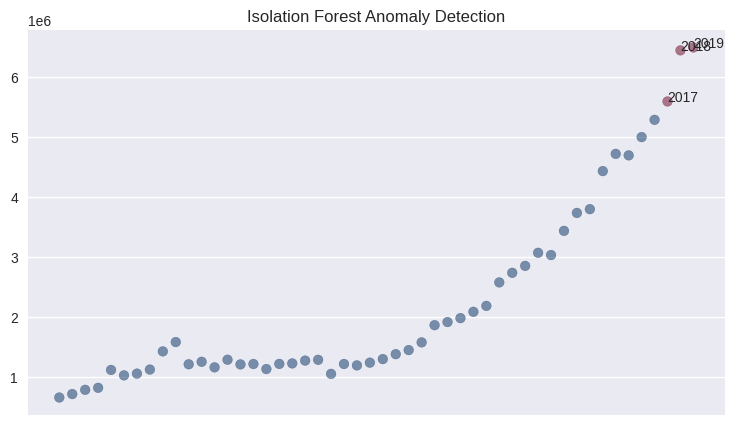

In [ ]:
plt.style.use("seaborn")
fig, ax4 = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
ax4.scatter(df['year'], df['median'],c=df['IF_anomaly_05'],cmap='RdBu',alpha=0.5 )
ax4.set_title("Isolation Forest Anomaly Detection")

for anomaly in df[df['IF_anomaly_05'] == -1]['year']:
    ax4.annotate(anomaly, xy=(anomaly, df[df['year'] == anomaly]['median']),
                 xytext=(anomaly,df[df['year'] == anomaly]['median'] + 0.2))
ax4.get_xaxis().set_visible(False)

In [ ]:
from sklearn.svm import OneClassSVM
model_svm = OneClassSVM()
svm_predictions = model_svm.fit_predict(df[['median']])
svm_scores = model_svm.decision_function(df[['median']])
df['SVM_anomaly_scores'] = svm_scores
df['SVM_anomaly'] = svm_predictions

<ipython-input-27-ce56d789eeab>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


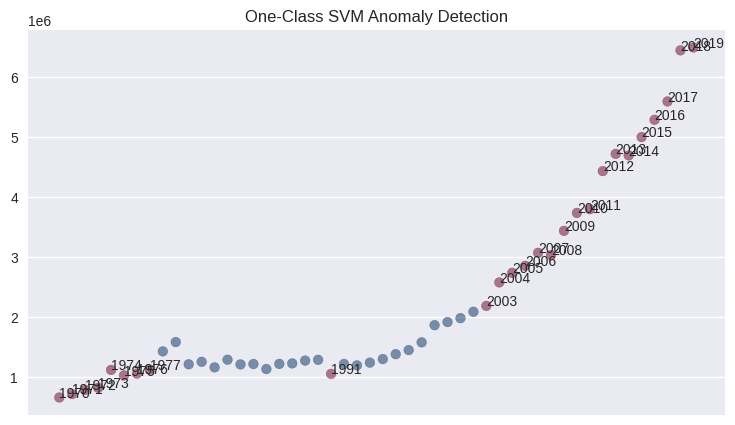

In [ ]:
plt.style.use("seaborn")
fig, ax = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
sc = ax.scatter(df['year'], df['median'], c=df['SVM_anomaly'], cmap='RdBu', alpha=0.5)
ax.set_title("One-Class SVM Anomaly Detection")
for anomaly in df[df['SVM_anomaly'] == -1]['year']:
    ax.annotate(anomaly, xy=(anomaly, df[df['year'] == anomaly]['median']),
                 xytext=(anomaly, df[df['year'] == anomaly]['median'] + 0.2))
ax.get_xaxis().set_visible(False)

In [ ]:
model_svm_10 = OneClassSVM(nu=0.1)  # Adjust nu based on your requirements
svm_predictions_10 = model_svm_10.fit_predict(df[['median']])
svm_scores_10 = model_svm_10.decision_function(df[['median']])
df['SVM_anomaly_score_10'] = svm_scores_10
df['SVM_anomaly_10'] = svm_predictions_10

<ipython-input-29-2994e3c2c8a9>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


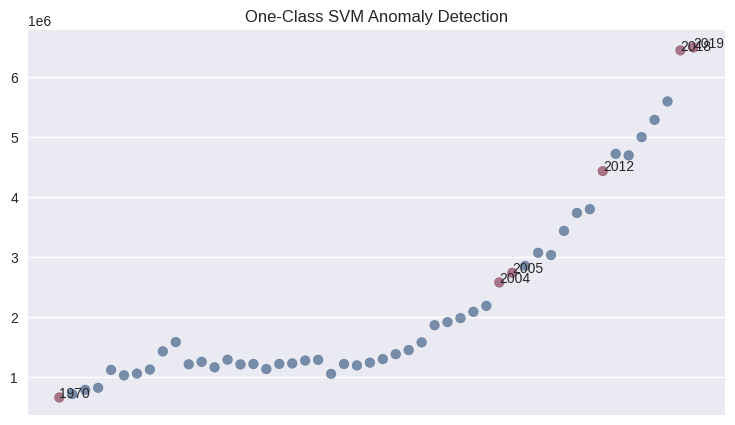

In [ ]:
plt.style.use("seaborn")
fig, ax2 = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)
sc = ax2.scatter(df['year'], df['median'], c=df['SVM_anomaly_10'], cmap='RdBu', alpha=0.5)
ax2.set_title("One-Class SVM Anomaly Detection")

for anomaly in df[df['SVM_anomaly_10'] == -1]['year']:
    ax2.annotate(anomaly, xy=(anomaly, df[df['year'] == anomaly]['median']),
                 xytext=(anomaly, df[df['year'] == anomaly]['median'] + 0.2))
ax2.get_xaxis().set_visible(False)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# LOF
precision_lof = precision_score(df['LOF_anomaly'], df['LOF_anomaly_10'], pos_label=-1)
recall_lof = recall_score(df['LOF_anomaly'], df['LOF_anomaly_10'], pos_label=-1)
f1_lof = f1_score(df['LOF_anomaly'], df['LOF_anomaly_10'], pos_label=-1)

# Isolation Forest
precision_if = precision_score(df['IF_anomaly'], df['IF_anomaly'], pos_label=-1)
recall_if = recall_score(df['IF_anomaly'], df['IF_anomaly'], pos_label=-1)
f1_if = f1_score(df['IF_anomaly'], df['IF_anomaly'], pos_label=-1)

# One-Class SVM
precision_svm = precision_score(df['SVM_anomaly'], df['SVM_anomaly_10'], pos_label=-1)
recall_svm = recall_score(df['SVM_anomaly'], df['SVM_anomaly_10'], pos_label=-1)
f1_svm = f1_score(df['SVM_anomaly'], df['SVM_anomaly_10'], pos_label=-1)

# Menampilkan hasil
print("LOF Precision:", precision_lof)
print("LOF Recall:", recall_lof)
print("LOF F1-score:", f1_lof)
print("---")
print("Isolation Forest Precision:", precision_if)
print("Isolation Forest Recall:", recall_if)
print("Isolation Forest F1-score:", f1_if)
print("---")
print("One-Class SVM Precision:", precision_svm)
print("One-Class SVM Recall:", recall_svm)
print("One-Class SVM F1-score:", f1_svm)

LOF Precision: 0.5882352941176471
LOF Recall: 0.38461538461538464
LOF F1-score: 0.46511627906976744
---
Isolation Forest Precision: 1.0
Isolation Forest Recall: 1.0
Isolation Forest F1-score: 1.0
---
One-Class SVM Precision: 1.0
One-Class SVM Recall: 0.23076923076923078
One-Class SVM F1-score: 0.375
